In [1]:
import sys

sys.path.append('/usr/local/lib/python2.7/site-packages')

import os
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def temp_match(img, template, temp_scale):
    template_scaled = cv2.resize(template, (0, 0), fx=temp_scale, fy=temp_scale)
    res = cv2.matchTemplate(img, template_scaled, cv2.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    return top_left, max_val


In [107]:
# Get REFERENCE:
img1 = cv2.imread('./images/REF.tif', cv2.CV_LOAD_IMAGE_GRAYSCALE)


In [117]:
# Get SAMPLE:
# img2 = cv2.imread('./images/tests/lens_BW_500ms.png', cv2.CV_LOAD_IMAGE_GRAYSCALE)
fim = 'lens_RGB_500ms.png'
img2 = cv2.imread('./images/tests/%s' % fim, cv2.CV_LOAD_IMAGE_GRAYSCALE)


In [109]:
REF = img1 #img1
SAMPLE = img2 #img2

print REF.shape
print SAMPLE.shape

(164, 218)
(768, 1024)


In [110]:
# now let's automatically detect the scaling
if REF.shape[0] > SAMPLE.shape[0]:
    scale_range = np.arange(0.2, 3, 0.2)
else:
    scale_range = np.arange(1, 4, 0.2)
print scale_range

# This breaks if REF is much bigger than SAMPLE

[ 1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8]


In [111]:
match_by_scale = [temp_match(SAMPLE, REF, scale) for scale in scale_range]
for scale, match_val in zip(scale_range, match_by_scale):
    print "Scale {}: p={}, v={}".format(scale, match_val[0], match_val[1])


Scale 1.0: p=(338, 243), v=0.962720632553
Scale 1.2: p=(326, 239), v=0.96340483427
Scale 1.4: p=(322, 230), v=0.963969528675
Scale 1.6: p=(313, 224), v=0.966079473495
Scale 1.8: p=(302, 219), v=0.967516243458
Scale 2.0: p=(333, 200), v=0.970873892307
Scale 2.2: p=(297, 198), v=0.974121749401
Scale 2.4: p=(267, 190), v=0.973382949829
Scale 2.6: p=(229, 185), v=0.972998559475
Scale 2.8: p=(199, 164), v=0.971441268921
Scale 3.0: p=(171, 153), v=0.965118527412
Scale 3.2: p=(169, 135), v=0.955651819706
Scale 3.4: p=(142, 81), v=0.946208775043
Scale 3.6: p=(106, 70), v=0.937168955803
Scale 3.8: p=(76, 60), v=0.927927672863


In [121]:
# showing best result
max_idx = np.argmax(np.array(match_by_scale)[:, 1])
best_scale = scale_range[max_idx]
best_translation = match_by_scale[max_idx][0]

print best_translation
print best_scale

merged_image_temp_match = np.zeros((SAMPLE.shape[0], SAMPLE.shape[1], 3), dtype=np.uint8)
merged_image_temp_match[:, :, 0] = SAMPLE #img2

ref_scale_trans_best = cv2.resize(REF, (0, 0), fx=best_scale, fy=best_scale)
print ref_scale_trans_best.shape
print REF.shape
merged_image_temp_match[best_translation[1]:best_translation[1]+ref_scale_trans_best.shape[0], best_translation[0]:best_translation[0]+ref_scale_trans_best.shape[1], 1] = ref_scale_trans_best
print merged_image_temp_match.shape

(297, 198)
2.2
(361, 480)
(164, 218)
(768, 1024, 3)


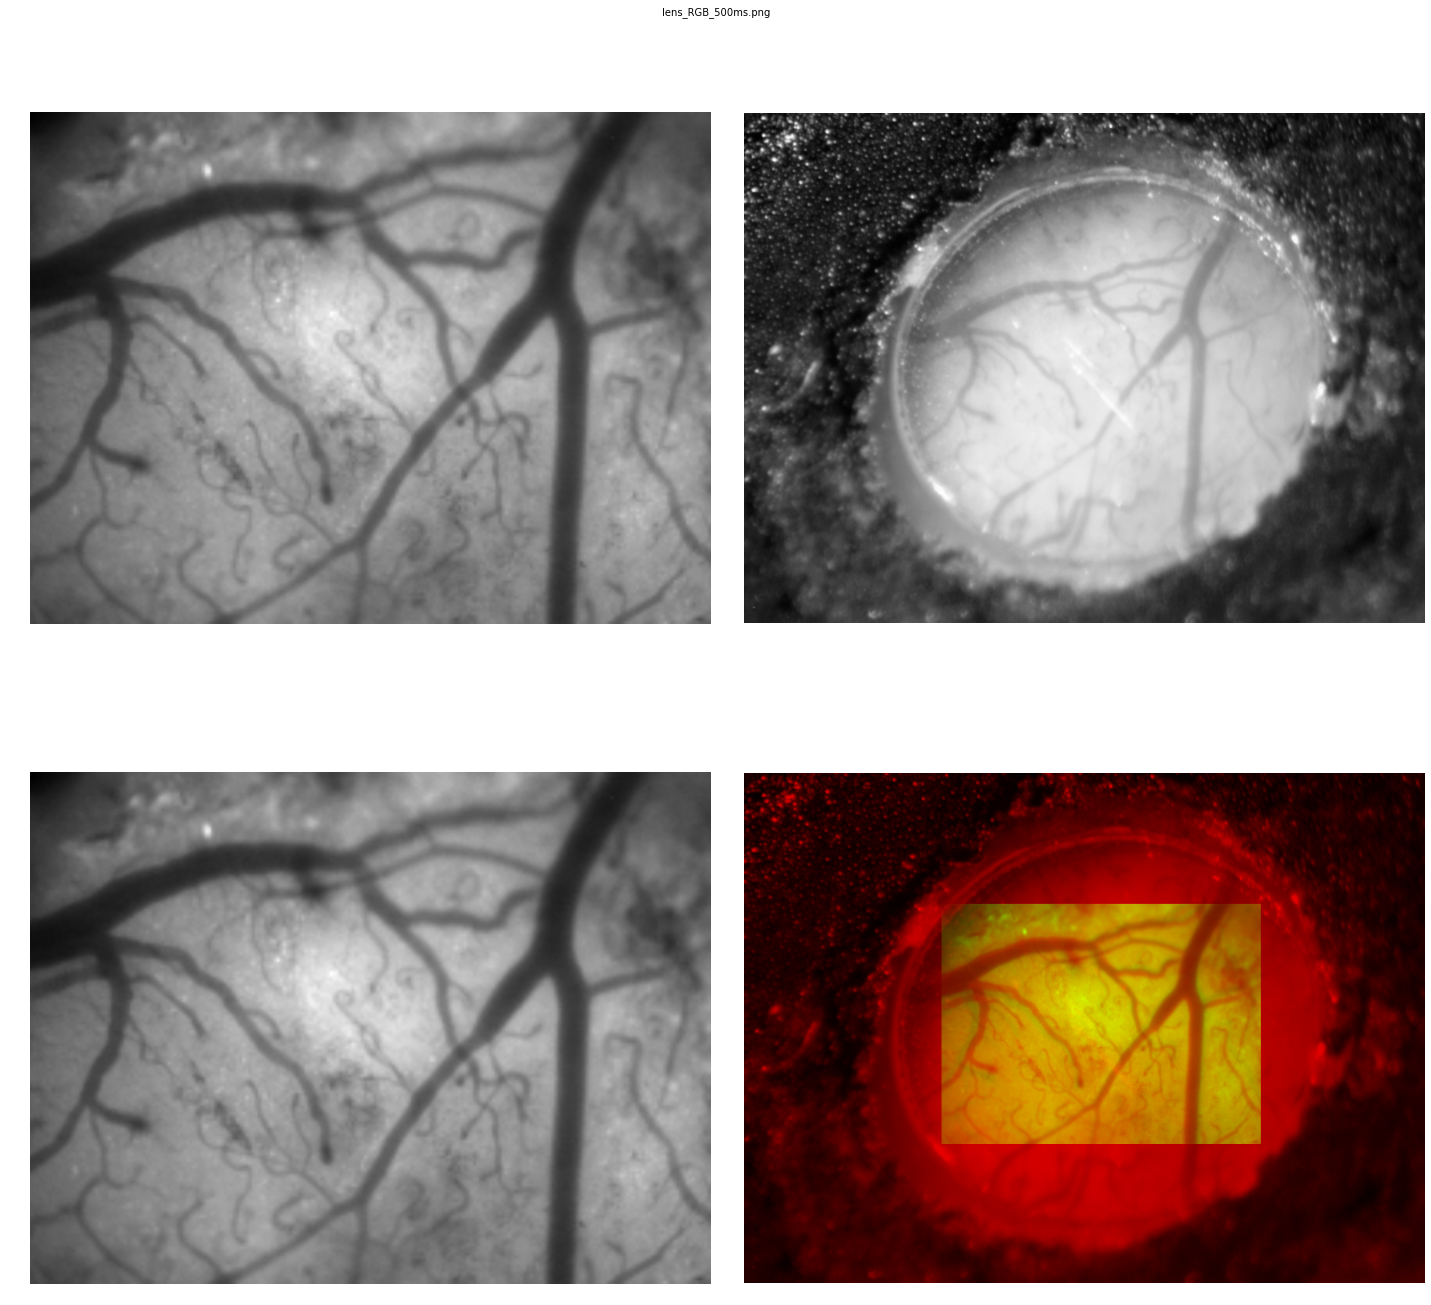

In [120]:
# PLOT:

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(222)
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.subplot(223)
plt.imshow(ref_scale_trans_best, cmap='gray')
plt.axis('off')

plt.subplot(224)
plt.imshow(merged_image_temp_match, cmap='jet')
plt.axis('off')
plt.suptitle('lens_RGB_500ms.png')

plt.tight_layout()

outpath = './output'
imname = 'scale_trans_only_IM%s' % fim
plt.savefig(os.path.join(outpath, imname))

In [9]:
# # TEST EACH:
# # width = number of columns, and height = number of rows

# rows,cols = img1.shape
# tx = best_translation[0] - cols
# ty = best_translation[1] - rows

# M = np.float32([[1,0,tx],[0,1,ty]])
# dst = cv2.warpAffine(img1,M,(cols,rows))

# cv2.imshow('img',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()